<a href="https://colab.research.google.com/github/ProsperChuks/COVID-19-Data-Analysis/blob/main/covid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Data

In [24]:
covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

countries = covid.location.drop_duplicates().reset_index(drop=True)

def country_plot(column, country, plot_ma=False, y_max=200):
  try:
    indexer = covid[covid['location'] == country].index
    indexer = indexer.dropna()
    country_tc = covid.loc[indexer, 'date': column]
    country_tc = country_tc.dropna()
    country_tc.set_index('date', inplace=True)
    country_tc.drop(country_tc.columns.difference([column]), axis=1, inplace=True)
    country_tc.plot(figsize=(12, 9), ylim=[0, y_max])
    if plot_ma == True:
      country_tc.rolling(window=30).mean()[column].plot()
  except Exception as e:
    print(e)

### Do Lockdowns Work?


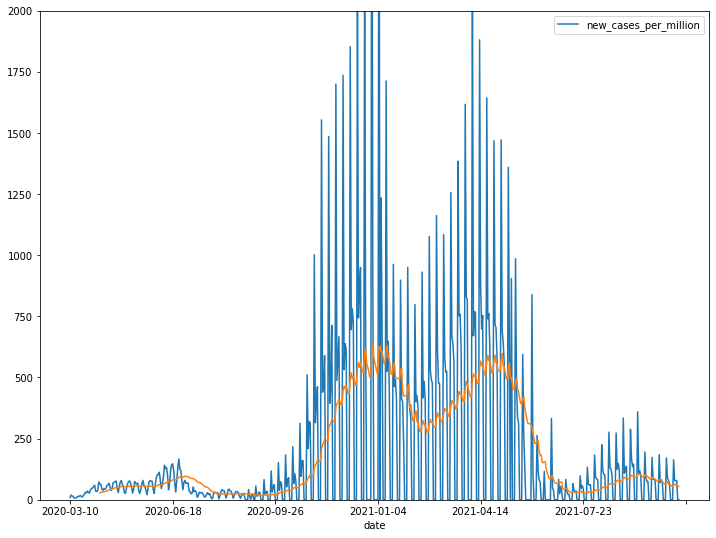

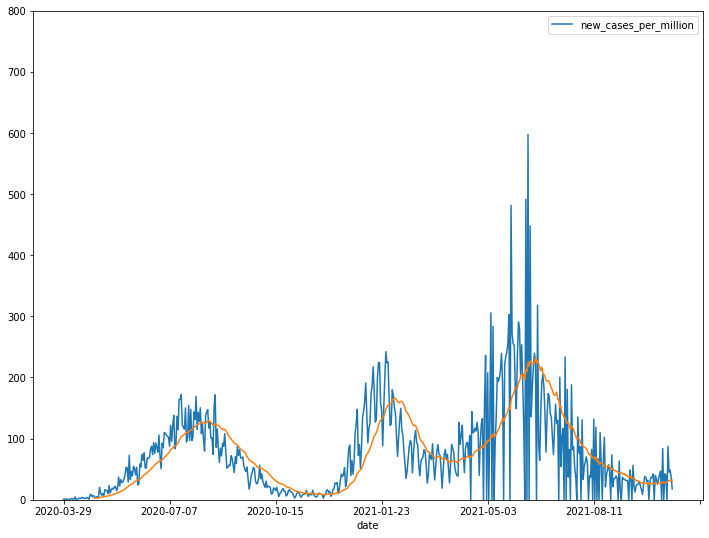

In [28]:
country_plot('new_cases_per_million', 'Sweden', True, 2000)
country_plot('new_cases_per_million', 'Bolivia', True, 800)

### How does Median Age Effect Death-Rate

Japan has a Higher Median age than Serbia but still gets lower number of deaths per million than Serbia

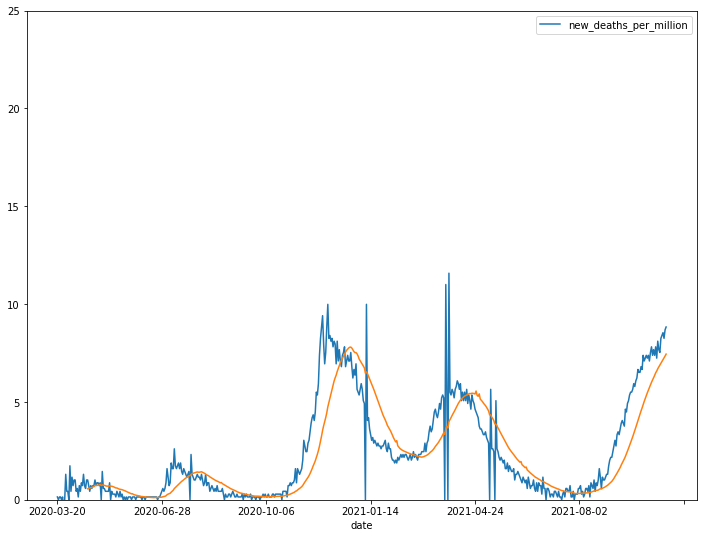

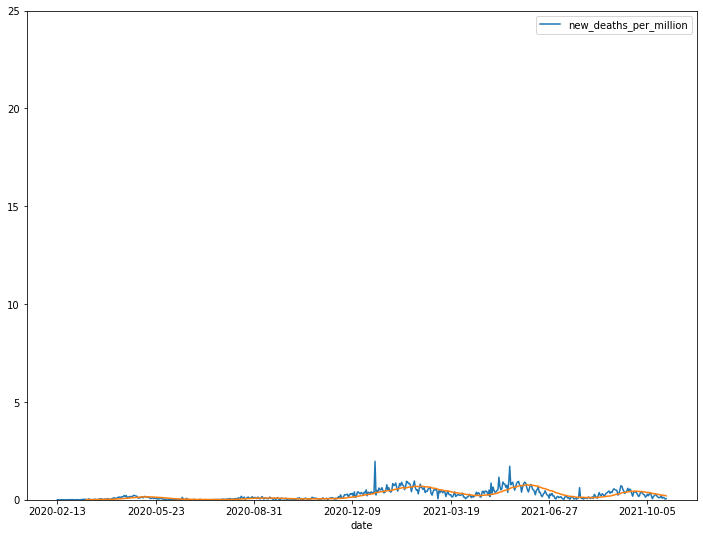

In [31]:
country_plot('new_deaths_per_million', 'Serbia', True, 25)
country_plot('new_deaths_per_million', 'Japan', True, 25)